# Creating pseudo visualization in python

## Cleaning the data

In [1]:
# import the required moduls

import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
# read in the data

df = pd.read_csv("data.csv", delimiter=",")
df_full = pd.read_csv("20200420_SPARQL_ExportV3.csv", delimiter=",")
df_query = pd.read_csv("query.csv", delimiter=",")

In [3]:
df.head()

person  \
0    http://www.wikidata.org/entity/Q165421   
1    http://www.wikidata.org/entity/Q165421   
2    http://www.wikidata.org/entity/Q165421   
3  http://www.wikidata.org/entity/Q21339404   
4    http://www.wikidata.org/entity/Q165421   

                                   value    valueLabel                  Born  \
0  http://www.wikidata.org/entity/Q11030  Journalismus  1929-07-28T00:00:00Z   
1  http://www.wikidata.org/entity/Q11030  Journalismus  1929-07-28T00:00:00Z   
2  http://www.wikidata.org/entity/Q11030  Journalismus  1929-07-28T00:00:00Z   
3   http://www.wikidata.org/entity/Q1986          2003  1977-01-18T00:00:00Z   
4  http://www.wikidata.org/entity/Q11030  Journalismus  1929-07-28T00:00:00Z   

                                      Child  
0    http://www.wikidata.org/entity/Q230303  
1    http://www.wikidata.org/entity/Q316064  
2   http://www.wikidata.org/entity/Q3290402  
3                                       NaN  
4  http://www.wikidata.org/entity/Q75326753

In [4]:
# remove the "http://www.wikidata.org/entity/" prefix from the colums person, value and Child

df["person"] = df["person"].replace("http://www.wikidata.org/entity/","", regex = True)
df["value"] = df["value"].replace("http://www.wikidata.org/entity/","", regex = True)
df["Child"] = df["Child"].replace("http://www.wikidata.org/entity/","", regex = True)

In [5]:
# clean data, remove "http://www.wikidata.org/entity/" prefix

def remove_prefix(x):
        
    x["person"] = x["person"].replace("http://www.wikidata.org/entity/","", regex = True)
    x["value"] = x["value"].replace("http://www.wikidata.org/entity/","", regex = True)
    x["Child"] = x["Child"].replace("http://www.wikidata.org/entity/","", regex = True)

In [6]:
df.head()

person   value    valueLabel                  Born      Child
0    Q165421  Q11030  Journalismus  1929-07-28T00:00:00Z    Q230303
1    Q165421  Q11030  Journalismus  1929-07-28T00:00:00Z    Q316064
2    Q165421  Q11030  Journalismus  1929-07-28T00:00:00Z   Q3290402
3  Q21339404   Q1986          2003  1977-01-18T00:00:00Z        NaN
4    Q165421  Q11030  Journalismus  1929-07-28T00:00:00Z  Q75326753

In [7]:
# remove the timestamp from the column Born

df["Born"] = pd.to_datetime(df['Born'])
df["Born"] = df["Born"].dt.date

In [8]:
# remove the timestamp from the column born

def remove_timestamp(x):
    
    x["Born"] = pd.to_datetime(x['Born'])
    x["Born"] = x["Born"].dt.date

In [9]:
'''
Ask wether or not we should add multiple kids from the same person
'''

# df.drop_duplicates(subset=["person"])

'\nAsk wether or not we should add multiple kids from the same person\n'

In [10]:
# create a new column with just the year, the parent (person) was born

df["Born_year"] = pd.DatetimeIndex(df["Born"]).year

In [11]:
# create a column with the year the parent was born in

def get_dob_parent(x):
    
    x["Born_year"] = pd.DatetimeIndex(x["Born"]).year

In [12]:
df.head()

person   value    valueLabel        Born      Child  Born_year
0    Q165421  Q11030  Journalismus  1929-07-28    Q230303       1929
1    Q165421  Q11030  Journalismus  1929-07-28    Q316064       1929
2    Q165421  Q11030  Journalismus  1929-07-28   Q3290402       1929
3  Q21339404   Q1986          2003  1977-01-18        NaN       1977
4    Q165421  Q11030  Journalismus  1929-07-28  Q75326753       1929

In [13]:
df["person"].value_counts()

Q165421       4
Q50437943     2
Q55038248     2
Q365628       2
Q4055592      1
Q55955766     1
Q16625611     1
Q4062321      1
Q10799144     1
Q4512885      1
Q4095539      1
Q708464       1
Q80151547     1
Q47506337     1
Q18634148     1
Q47170765     1
Q30921945     1
Q47506299     1
Q47506365     1
Q47506360     1
Q6110805      1
Q4140917      1
Q4521662      1
Q106328215    1
Q60695333     1
Q16302728     1
Q56759969     1
Q99767894     1
Q10290183     1
Q4317546      1
Q4160798      1
Q5920394      1
Q95726655     1
Q6243642      1
Q21339404     1
Q5709637      1
Q5791547      1
Q87749476     1
Q15065525     1
Q28852336     1
Q94994874     1
Q62006199     1
Q99829988     1
Name: person, dtype: int64

In [14]:
df["Born_year"]=df["Born_year"].astype(float)

## Full Dataset

<p>Containing all academics, who have children</p>

In [15]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83408 entries, 0 to 83407
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   person      83408 non-null  object
 1   value       83408 non-null  object
 2   valueLabel  83408 non-null  object
 3   Born        83408 non-null  object
 4   Child       3040 non-null   object
dtypes: object(5)
memory usage: 3.2+ MB


In [16]:
df_full["person"] = df_full["person"].replace("http://www.wikidata.org/entity/","", regex = True)
df_full["value"] = df_full["value"].replace("http://www.wikidata.org/entity/","", regex = True)
df_full["Child"] = df_full["Child"].replace("http://www.wikidata.org/entity/","", regex = True)

In [17]:
df_full["Born_year"] = pd.DatetimeIndex(df_full["Born"]).year

In [18]:
df_full.head()

person   value    valueLabel                  Born      Child  Born_year
0    Q165421  Q11030  Journalismus  1929-07-28T00:00:00Z    Q230303       1929
1    Q165421  Q11030  Journalismus  1929-07-28T00:00:00Z    Q316064       1929
2    Q165421  Q11030  Journalismus  1929-07-28T00:00:00Z   Q3290402       1929
3  Q21339404   Q1986          2003  1977-01-18T00:00:00Z        NaN       1977
4    Q165421  Q11030  Journalismus  1929-07-28T00:00:00Z  Q75326753       1929

In [19]:
df_full.drop(["value", "Born"], axis=1)

person    valueLabel      Child  Born_year
0         Q165421  Journalismus    Q230303       1929
1         Q165421  Journalismus    Q316064       1929
2         Q165421  Journalismus   Q3290402       1929
3       Q21339404          2003        NaN       1977
4         Q165421  Journalismus  Q75326753       1929
...           ...           ...        ...        ...
83403  Q110197975    Q110196743        NaN       1916
83404   Q90252123    Q108891927        NaN       1963
83405   Q87769173    Q109969317        NaN       1964
83406  Q110197456    Q110197097        NaN       1908
83407    Q2830079     Lizenziat        NaN       1972

[83408 rows x 4 columns]

## Calculating the percentage

In [20]:
df_full["person"].value_counts()

Q25706652     24
Q17380952     18
Q26215688     16
Q60772        14
Q28571277     12
              ..
Q111017471     1
Q111017613     1
Q106956651     1
Q111036470     1
Q110197456     1
Name: person, Length: 72394, dtype: int64

In [21]:
df_test = df_query.drop_duplicates(subset=["Child"])

In [26]:
df_test["Born_year"] = pd.DatetimeIndex(df_test["Born"]).year

/var/folders/wm/t87_jx651gvfm3t05dzg24440000gn/T/ipykernel_18290/1743020424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Born_year"] = pd.DatetimeIndex(df_test["Born"]).year


In [27]:
df_test

person  \
0        http://www.wikidata.org/entity/Q165421   
1        http://www.wikidata.org/entity/Q165421   
2        http://www.wikidata.org/entity/Q165421   
3        http://www.wikidata.org/entity/Q165421   
4      http://www.wikidata.org/entity/Q55038248   
6      http://www.wikidata.org/entity/Q11854074   
7        http://www.wikidata.org/entity/Q269895   
8       http://www.wikidata.org/entity/Q3191952   
9       http://www.wikidata.org/entity/Q3191952   
10      http://www.wikidata.org/entity/Q3191952   
11      http://www.wikidata.org/entity/Q4131503   
12     http://www.wikidata.org/entity/Q13533346   
13        http://www.wikidata.org/entity/Q57434   
14        http://www.wikidata.org/entity/Q57434   
15     http://www.wikidata.org/entity/Q43186301   
18        http://www.wikidata.org/entity/Q67449   
19        http://www.wikidata.org/entity/Q67449   
20        http://www.wikidata.org/entity/Q67449   
21       http://www.wikidata.org/entity/Q107319   
22       http://www.wikidata.org/entity/Q107319   
23       http://www.wikidata.org/entity/Q107319   
24       http://www.wikidata.org/entity/Q107319   
25       http://www.wikidata.org/entity/Q107319   
26       http://www.wikidata.org/entity/Q192695   
32       http://www.wikidata.org/entity/Q319803   
33       http://www.wikidata.org/entity/Q132489   
34       http://www.wikidata.org/entity/Q132489   
35       http://www.wikidata.org/entity/Q235032   
36       http://www.wikidata.org/entity/Q164428   
37       http://www.wikidata.org/entity/Q822687   
38       http://www.wikidata.org/entity/Q923577   
39       http://www.wikidata.org/entity/Q923577   
40       http://www.wikidata.org/entity/Q553419   
41       http://www.wikidata.org/entity/Q555945   
42      http://www.wikidata.org/entity/Q1581828   
43      http://www.wikidata.org/entity/Q1130079   
44      http://www.wikidata.org/entity/Q2080045   
45      http://www.wikidata.org/entity/Q2080045   
46      http://www.wikidata.org/entity/Q2343513   
47      http://www.wikidata.org/entity/Q2343513   
48      http://www.wikidata.org/entity/Q2038532   
50      http://www.wikidata.org/entity/Q2223288   
51      http://www.wikidata.org/entity/Q3506276   
52      http://www.wikidata.org/entity/Q4062994   
53      http://www.wikidata.org/entity/Q3506276   
54      http://www.wikidata.org/entity/Q4062994   
55      http://www.wikidata.org/entity/Q4074471   
56      http://www.wikidata.org/entity/Q4088039   
57      http://www.wikidata.org/entity/Q3541430   
58      http://www.wikidata.org/entity/Q3541430   
59      http://www.wikidata.org/entity/Q4075393   
60      http://www.wikidata.org/entity/Q2978546   
62      http://www.wikidata.org/entity/Q2884020   
63      http://www.wikidata.org/entity/Q4078774   
64      http://www.wikidata.org/entity/Q3655901   
65      http://www.wikidata.org/entity/Q4114278   
66      http://www.wikidata.org/entity/Q4125633   
67      http://www.wikidata.org/entity/Q4408656   
68      http://www.wikidata.org/entity/Q4681651   
69      http://www.wikidata.org/entity/Q4519313   
70      http://www.wikidata.org/entity/Q4419820   
71      http://www.wikidata.org/entity/Q4247873   
72      http://www.wikidata.org/entity/Q4247873   
73      http://www.wikidata.org/entity/Q6149271   
74      http://www.wikidata.org/entity/Q7178527   
75      http://www.wikidata.org/entity/Q7930156   
76      http://www.wikidata.org/entity/Q9179923   
77      http://www.wikidata.org/entity/Q7423946   
78     http://www.wikidata.org/entity/Q11230425   
79      http://www.wikidata.org/entity/Q9381843   
80     http://www.wikidata.org/entity/Q11015464   
81     http://www.wikidata.org/entity/Q10816903   
82      http://www.wikidata.org/entity/Q9388408   
83     http://www.wikidata.org/entity/Q11865874   
84     http://www.wikidata.org/entity/Q11992728   
85     http://www.wikidata.org/entity/Q11906028   
86     http://www.wikidata.org/entity/Q11792281   
87     http://www.wikidata.org/entity/Q11789653   
88     http:

In [28]:
df_test.reset_index

<bound method DataFrame.reset_index of                                          person  \
0        http://www.wikidata.org/entity/Q165421   
1        http://www.wikidata.org/entity/Q165421   
2        http://www.wikidata.org/entity/Q165421   
3        http://www.wikidata.org/entity/Q165421   
4      http://www.wikidata.org/entity/Q55038248   
6      http://www.wikidata.org/entity/Q11854074   
7        http://www.wikidata.org/entity/Q269895   
8       http://www.wikidata.org/entity/Q3191952   
9       http://www.wikidata.org/entity/Q3191952   
10      http://www.wikidata.org/entity/Q3191952   
11      http://www.wikidata.org/entity/Q4131503   
12     http://www.wikidata.org/entity/Q13533346   
13        http://www.wikidata.org/entity/Q57434   
14        http://www.wikidata.org/entity/Q57434   
15     http://www.wikidata.org/entity/Q43186301   
18        http://www.wikidata.org/entity/Q67449   
19        http://www.wikidata.org/entity/Q67449   
20        http://www.wikidata.org/entity/Q6

In [29]:
df_test.loc[df_test["person"] == "Q25706652"]

Empty DataFrame
Columns: [person, value, valueLabel, Born, Child, Born_year]
Index: []

In [30]:
pd.set_option("display.max_rows", None)

df_test["Born_year"].value_counts().sort_values(ascending=True)

1976     1
1986     1
1983     1
1974     2
1975     2
1970     2
1981     3
1971     3
1982     4
1978     5
1979     5
1977     6
1969     6
1972     7
1960     8
1980     8
1973     9
1968    11
1963    13
1966    13
1961    14
1967    14
1964    15
1965    15
1956    16
1962    16
1959    18
1917    18
1958    21
1914    22
1945    24
1952    24
1954    24
1904    25
1909    25
1906    25
1905    25
1943    26
1919    27
1950    28
1918    29
1957    30
1916    31
1912    31
1953    31
1903    32
1948    32
1955    32
1907    33
1920    33
1944    33
1901    34
1911    34
1946    36
1913    36
1951    36
1924    38
1922    38
1910    38
1925    39
1902    39
1934    40
1939    41
1938    41
1921    41
1942    41
1949    42
1935    43
1941    43
1933    43
1926    43
1936    44
1908    45
1940    46
1931    46
1927    47
1915    50
1947    51
1928    53
1930    55
1937    55
1929    57
1932    63
1923    64
Name: Born_year, dtype: int64

In [31]:
df_test.drop(["value", "Born"], axis=1)

person  \
0        http://www.wikidata.org/entity/Q165421   
1        http://www.wikidata.org/entity/Q165421   
2        http://www.wikidata.org/entity/Q165421   
3        http://www.wikidata.org/entity/Q165421   
4      http://www.wikidata.org/entity/Q55038248   
6      http://www.wikidata.org/entity/Q11854074   
7        http://www.wikidata.org/entity/Q269895   
8       http://www.wikidata.org/entity/Q3191952   
9       http://www.wikidata.org/entity/Q3191952   
10      http://www.wikidata.org/entity/Q3191952   
11      http://www.wikidata.org/entity/Q4131503   
12     http://www.wikidata.org/entity/Q13533346   
13        http://www.wikidata.org/entity/Q57434   
14        http://www.wikidata.org/entity/Q57434   
15     http://www.wikidata.org/entity/Q43186301   
18        http://www.wikidata.org/entity/Q67449   
19        http://www.wikidata.org/entity/Q67449   
20        http://www.wikidata.org/entity/Q67449   
21       http://www.wikidata.org/entity/Q107319   
22       http://www.wikidata.org/entity/Q107319   
23       http://www.wikidata.org/entity/Q107319   
24       http://www.wikidata.org/entity/Q107319   
25       http://www.wikidata.org/entity/Q107319   
26       http://www.wikidata.org/entity/Q192695   
32       http://www.wikidata.org/entity/Q319803   
33       http://www.wikidata.org/entity/Q132489   
34       http://www.wikidata.org/entity/Q132489   
35       http://www.wikidata.org/entity/Q235032   
36       http://www.wikidata.org/entity/Q164428   
37       http://www.wikidata.org/entity/Q822687   
38       http://www.wikidata.org/entity/Q923577   
39       http://www.wikidata.org/entity/Q923577   
40       http://www.wikidata.org/entity/Q553419   
41       http://www.wikidata.org/entity/Q555945   
42      http://www.wikidata.org/entity/Q1581828   
43      http://www.wikidata.org/entity/Q1130079   
44      http://www.wikidata.org/entity/Q2080045   
45      http://www.wikidata.org/entity/Q2080045   
46      http://www.wikidata.org/entity/Q2343513   
47      http://www.wikidata.org/entity/Q2343513   
48      http://www.wikidata.org/entity/Q2038532   
50      http://www.wikidata.org/entity/Q2223288   
51      http://www.wikidata.org/entity/Q3506276   
52      http://www.wikidata.org/entity/Q4062994   
53      http://www.wikidata.org/entity/Q3506276   
54      http://www.wikidata.org/entity/Q4062994   
55      http://www.wikidata.org/entity/Q4074471   
56      http://www.wikidata.org/entity/Q4088039   
57      http://www.wikidata.org/entity/Q3541430   
58      http://www.wikidata.org/entity/Q3541430   
59      http://www.wikidata.org/entity/Q4075393   
60      http://www.wikidata.org/entity/Q2978546   
62      http://www.wikidata.org/entity/Q2884020   
63      http://www.wikidata.org/entity/Q4078774   
64      http://www.wikidata.org/entity/Q3655901   
65      http://www.wikidata.org/entity/Q4114278   
66      http://www.wikidata.org/entity/Q4125633   
67      http://www.wikidata.org/entity/Q4408656   
68      http://www.wikidata.org/entity/Q4681651   
69      http://www.wikidata.org/entity/Q4519313   
70      http://www.wikidata.org/entity/Q4419820   
71      http://www.wikidata.org/entity/Q4247873   
72      http://www.wikidata.org/entity/Q4247873   
73      http://www.wikidata.org/entity/Q6149271   
74      http://www.wikidata.org/entity/Q7178527   
75      http://www.wikidata.org/entity/Q7930156   
76      http://www.wikidata.org/entity/Q9179923   
77      http://www.wikidata.org/entity/Q7423946   
78     http://www.wikidata.org/entity/Q11230425   
79      http://www.wikidata.org/entity/Q9381843   
80     http://www.wikidata.org/entity/Q11015464   
81     http://www.wikidata.org/entity/Q10816903   
82      http://www.wikidata.org/entity/Q9388408   
83     http://www.wikidata.org/entity/Q11865874   
84     http://www.wikidata.org/entity/Q11992728   
85     http://www.wikidata.org/entity/Q11906028   
86     http://www.wikidata.org/entity/Q11792281   
87     http://www.wikidata.org/entity/Q11789653   
88     http:

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 3041
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   person      2341 non-null   object
 1   value       2341 non-null   object
 2   valueLabel  2341 non-null   object
 3   Born        2341 non-null   object
 4   Child       2341 non-null   object
 5   Born_year   2341 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 128.0+ KB


In [33]:
df_test["Child_academic"] = df_test.person.isin(df_full.Child).astype(int)

/var/folders/wm/t87_jx651gvfm3t05dzg24440000gn/T/ipykernel_18290/2071239997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Child_academic"] = df_test.person.isin(df_full.Child).astype(int)


In [34]:
df_test

person  \
0        http://www.wikidata.org/entity/Q165421   
1        http://www.wikidata.org/entity/Q165421   
2        http://www.wikidata.org/entity/Q165421   
3        http://www.wikidata.org/entity/Q165421   
4      http://www.wikidata.org/entity/Q55038248   
6      http://www.wikidata.org/entity/Q11854074   
7        http://www.wikidata.org/entity/Q269895   
8       http://www.wikidata.org/entity/Q3191952   
9       http://www.wikidata.org/entity/Q3191952   
10      http://www.wikidata.org/entity/Q3191952   
11      http://www.wikidata.org/entity/Q4131503   
12     http://www.wikidata.org/entity/Q13533346   
13        http://www.wikidata.org/entity/Q57434   
14        http://www.wikidata.org/entity/Q57434   
15     http://www.wikidata.org/entity/Q43186301   
18        http://www.wikidata.org/entity/Q67449   
19        http://www.wikidata.org/entity/Q67449   
20        http://www.wikidata.org/entity/Q67449   
21       http://www.wikidata.org/entity/Q107319   
22       http://www.wikidata.org/entity/Q107319   
23       http://www.wikidata.org/entity/Q107319   
24       http://www.wikidata.org/entity/Q107319   
25       http://www.wikidata.org/entity/Q107319   
26       http://www.wikidata.org/entity/Q192695   
32       http://www.wikidata.org/entity/Q319803   
33       http://www.wikidata.org/entity/Q132489   
34       http://www.wikidata.org/entity/Q132489   
35       http://www.wikidata.org/entity/Q235032   
36       http://www.wikidata.org/entity/Q164428   
37       http://www.wikidata.org/entity/Q822687   
38       http://www.wikidata.org/entity/Q923577   
39       http://www.wikidata.org/entity/Q923577   
40       http://www.wikidata.org/entity/Q553419   
41       http://www.wikidata.org/entity/Q555945   
42      http://www.wikidata.org/entity/Q1581828   
43      http://www.wikidata.org/entity/Q1130079   
44      http://www.wikidata.org/entity/Q2080045   
45      http://www.wikidata.org/entity/Q2080045   
46      http://www.wikidata.org/entity/Q2343513   
47      http://www.wikidata.org/entity/Q2343513   
48      http://www.wikidata.org/entity/Q2038532   
50      http://www.wikidata.org/entity/Q2223288   
51      http://www.wikidata.org/entity/Q3506276   
52      http://www.wikidata.org/entity/Q4062994   
53      http://www.wikidata.org/entity/Q3506276   
54      http://www.wikidata.org/entity/Q4062994   
55      http://www.wikidata.org/entity/Q4074471   
56      http://www.wikidata.org/entity/Q4088039   
57      http://www.wikidata.org/entity/Q3541430   
58      http://www.wikidata.org/entity/Q3541430   
59      http://www.wikidata.org/entity/Q4075393   
60      http://www.wikidata.org/entity/Q2978546   
62      http://www.wikidata.org/entity/Q2884020   
63      http://www.wikidata.org/entity/Q4078774   
64      http://www.wikidata.org/entity/Q3655901   
65      http://www.wikidata.org/entity/Q4114278   
66      http://www.wikidata.org/entity/Q4125633   
67      http://www.wikidata.org/entity/Q4408656   
68      http://www.wikidata.org/entity/Q4681651   
69      http://www.wikidata.org/entity/Q4519313   
70      http://www.wikidata.org/entity/Q4419820   
71      http://www.wikidata.org/entity/Q4247873   
72      http://www.wikidata.org/entity/Q4247873   
73      http://www.wikidata.org/entity/Q6149271   
74      http://www.wikidata.org/entity/Q7178527   
75      http://www.wikidata.org/entity/Q7930156   
76      http://www.wikidata.org/entity/Q9179923   
77      http://www.wikidata.org/entity/Q7423946   
78     http://www.wikidata.org/entity/Q11230425   
79      http://www.wikidata.org/entity/Q9381843   
80     http://www.wikidata.org/entity/Q11015464   
81     http://www.wikidata.org/entity/Q10816903   
82      http://www.wikidata.org/entity/Q9388408   
83     http://www.wikidata.org/entity/Q11865874   
84     http://www.wikidata.org/entity/Q11992728   
85     http://www.wikidata.org/entity/Q11906028   
86     http://www.wikidata.org/entity/Q11792281   
87     http://www.wikidata.org/entity/Q11789653   
88     http:

In [35]:
df_test["Child_academic"].value_counts()

0    2341
Name: Child_academic, dtype: int64

## Visualization

Idea:

Y-axis is the amount of children, whose parents born in that year, were academics
X-axis is the birthdate of the parents

<AxesSubplot:>

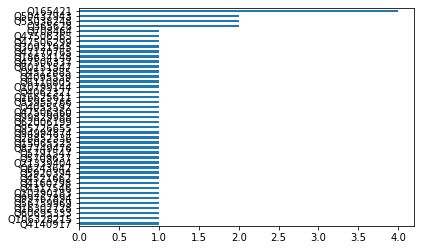

In [36]:
s = df.person.value_counts().sort_values()
s.plot(kind = "barh")